In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Input, Model
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin

In [20]:
data = load_wine()

In [98]:
data.data
X = data.data
X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)
#data.target

In [99]:
class Autoencoder(TransformerMixin, BaseEstimator):
    
    def __init__(self, n_components=2, input_shape=(13,)):
        self.n_components = n_components
        
        self.latent_dim = n_components

        encoder_input = Input(shape=input_shape, name='encoder_input')
        x = encoder_input
        
        x = layers.Dense(8, activation='relu')(x)        
        encoder_output = layers.Dense(self.n_components, name='latent_vector')(x) 
        
        self.encoder = Model(inputs=encoder_input, outputs=encoder_output, name='encoder')
        
        decoder_input = Input(shape=(self.n_components,), name='decoder_input')
        x = decoder_input
        
        x = layers.Dense(8, activation='relu')(x)  
        decoder_output = layers.Dense(13, activation='sigmoid', name='decoder_output')(x)  
        
        self.decoder = Model(inputs=decoder_input, outputs=decoder_output, name='decoder')
        
        self.autoencoder = Model(inputs=encoder_input,outputs=self.decoder(self.encoder(encoder_input)),name='autoencoder')
        self.autoencoder.compile(loss='mse', optimizer='adam')
        

    def fit(self, X, y=None, epochs=32, batch_size=8, shuffle=True, verbose=1):
        self.autoencoder.fit(X, y, epochs=epochs, batch_size=batch_size, shuffle=shuffle,verbose=verbose)
        return self

    def transform(self, X, y=None):
        encoded_images = self.encoder.predict(X)
        return encoded_images
    
    def saveModels(self, prefix=""):
        # serialize model to JSON
        model_json = self.autoencoder.to_json()
        with open("{}_{}autoencoder.json".format(prefix, self.n_components), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        self.autoencoder.save_weights("{}_{}autoencoder.h5".format(prefix, self.n_components))

        # serialize model to JSON
        model_json = self.encoder.to_json()
        with open("{}_{}encoder.json".format(prefix, self.n_components), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        self.encoder.save_weights("{}_{}encoder.h5".format(prefix, self.n_components))

        # serialize model to JSON
        model_json = self.decoder.to_json()
        with open("{}_{}decoder.json".format(prefix, self.n_components), "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        self.decoder.save_weights("{}_{}decoder.h5".format(prefix, self.n_components))

In [100]:
ae = Autoencoder()

In [101]:
ae.autoencoder.summary()
ae.encoder.summary()
ae.decoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 13)]              0         
_________________________________________________________________
encoder (Model)              (None, 2)                 130       
_________________________________________________________________
decoder (Model)              (None, 13)                141       
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 13)]              0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 112       
________________________________________

In [102]:
ae.autoencoder.fit(X,X, epochs=64, batch_size=1)

Train on 178 samples
Epoch 1/64
178/178 [==============================] - 0s 3ms/sample - loss: 0.0544
Epoch 2/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0456
Epoch 3/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0421
Epoch 4/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0400
Epoch 5/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0375
Epoch 6/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0352
Epoch 7/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0324
Epoch 8/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0285
Epoch 9/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0263
Epoch 10/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0252
Epoch 11/64
178/178 [==============================] - 0s 1ms/sample - loss: 0.0245
Epoch 12/64
178/178 [==============================] - 0s 1ms/sa

In [95]:
p = ae.encoder.predict(data.data)

Text(0.5,0,u'')

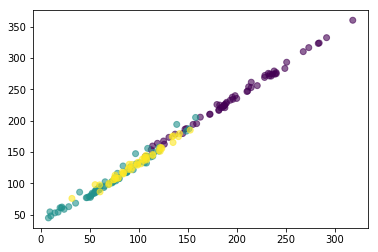

In [97]:
plt.scatter(p[:,0], p[:,1], c=data.target, alpha=0.6)
plt.xlabel('')